# Logistic Regression to predict Breast Cancer

In [168]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [169]:
data = pd.read_csv("./breast_cancer.csv")

## Data Analysis and Preprocessing

In [170]:
data.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


In [171]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [172]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [173]:
np.shape(data)

(569, 33)

In [174]:
data.groupby('diagnosis').count()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
diagnosis,,,,,,,,,,,,,,,,,,,,,
B,357,357,357,357,357,357,357,357,357,357,...,357,357,357,357,357,357,357,357,357,0
M,212,212,212,212,212,212,212,212,212,212,...,212,212,212,212,212,212,212,212,212,0


**our target variable 'diagnosis' had lables as B and M, we change them to 0 and 1 for our ease**

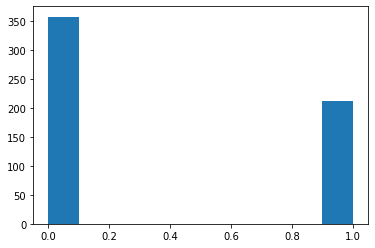

In [175]:
data = data.drop(data[['Unnamed: 32', 'id']],axis =1) #dropping the unnamed bad column
data[['diagnosis']] = data[['diagnosis']].replace(['M'], 1).replace(['B'], 0) #replacing Malignant with 1s and Benign with 0s
plt.hist(data['diagnosis'])
plt.show()

We find our correlation table

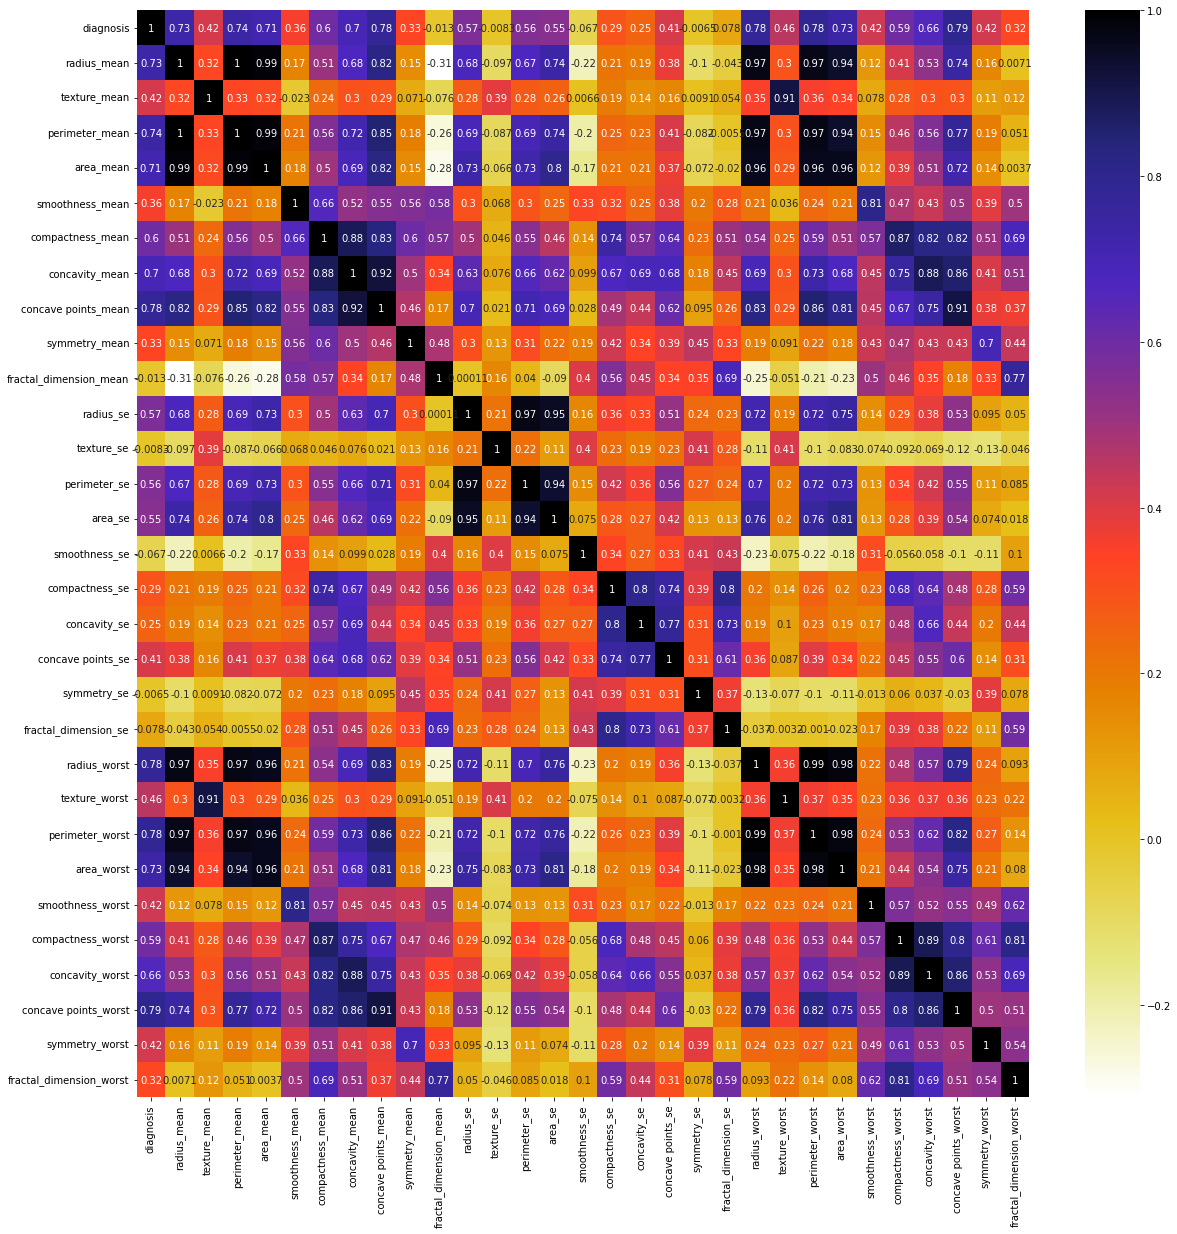

In [176]:
plt.figure(figsize=(20,20))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

**we see that most of the features are strongly correlated. Since area, perimeter are all directly proportional to radius,**
**for univariate Logistic regression, we select radius_mean as our feature**

# Univariate Logistic Regression

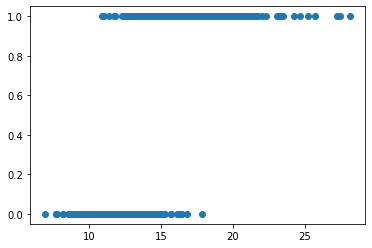

In [201]:
plt.scatter(data['radius_mean'], data['diagnosis'])

# Train-Test split

In [202]:
train_data = data.sample(frac = 0.75, random_state= 50)
test_data = data.drop(train_data.index)
train_data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
356,0,13.05,18.59,85.09,512.0,0.10820,0.13040,0.096030,0.05603,0.2035,...,14.19,24.85,94.22,591.2,0.1343,0.2658,0.25730,0.12580,0.3113,0.08317
556,0,10.16,19.59,64.73,311.7,0.10030,0.07504,0.005025,0.01116,0.1791,...,10.65,22.88,67.88,347.3,0.1265,0.1200,0.01005,0.02232,0.2262,0.06742
283,1,16.24,18.77,108.80,805.1,0.10660,0.18020,0.194800,0.09052,0.1876,...,18.55,25.09,126.90,1031.0,0.1365,0.4706,0.50260,0.17320,0.2770,0.10630
495,0,14.87,20.21,96.12,680.9,0.09587,0.08345,0.068240,0.04951,0.1487,...,16.01,28.48,103.90,783.6,0.1216,0.1388,0.17000,0.10170,0.2369,0.06599
364,0,13.40,16.95,85.48,552.4,0.07937,0.05696,0.021810,0.01473,0.1650,...,14.73,21.70,93.76,663.5,0.1213,0.1676,0.13640,0.06987,0.2741,0.07582


In [203]:
x_train = train_data['radius_mean']
y_train= train_data['diagnosis']

x_test = test_data['radius_mean']
y_test = test_data['diagnosis']

print(x_train.shape, x_test.shape,y_train.shape,y_test.shape)

(427,) (142,) (427,) (142,)


defining the sigmoid function first which would be used in several places later

In [204]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [181]:
def univariate_logistic_regression(x,y,alpha,iterations,threshold):
    n = x.shape[0]
    costs = []
    w = 0
    b = 0
    prev_cost = None

    for i in range(iterations):
        z = w*x + b
        ypred = sigmoid(z)
        error = y-ypred
        cost = -(1/n) * np.sum(y*np.log(ypred) + (1-y)*np.log(1-ypred)) # Log Likelihood
        if prev_cost and abs(prev_cost-cost)<=threshold:
            break

        dw = (-2/n) * np.sum(error * x)
        db = (-2/n) * np.sum(error)
        
        w = w - alpha * dw
        b = b - alpha * db
        
        costs.append(cost)
        prev_cost = cost
    
    plt.figure(figsize = (8,6))
    plt.plot(costs)
    plt.title("Cost vs Iterations")
    plt.ylabel("Cost")
    plt.xlabel("Iterations")
    plt.show()

    return w,b


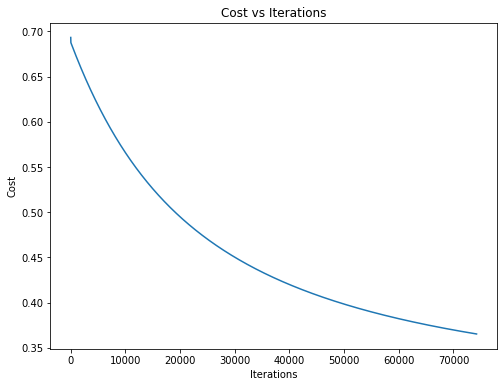

In [205]:
opt_w,opt_b = univariate_logistic_regression(x_train,y_train,alpha=0.001,iterations=200000,threshold=1e-6)

In [206]:
print(opt_w,opt_b)

0.4146124281775842 -6.367366432181821


In [207]:
def predict(x, w, b) :
    prediction = []
    z = w * x + b
    ypred = sigmoid(z)
    for predict in ypred:
        if predict >= .40: 
            prediction.append(1)
        else :
            prediction.append(0)

    return prediction, line, ypred 

In [208]:
prediction, line, ypred = predict(x_test, opt_w, opt_b)

**calculating score using sklearn metrics**

In [209]:
from sklearn.metrics import f1_score
F1_Score = f1_score(y_test, prediction)
print('F1 Score : ', F1_Score)

F1 Score :  0.8376068376068375


# Visualizing the data

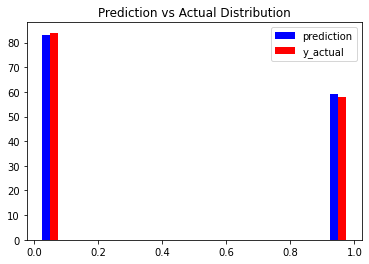

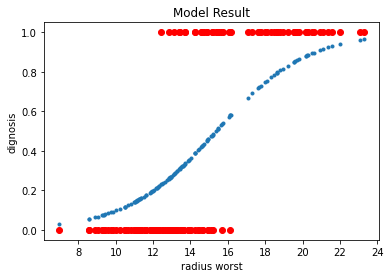

In [210]:
y_and_ypred = [prediction, y_test]
a = plt.subplot()
labels = ['prediction', 'y_actual']
colors = ['blue','red']
a.hist(y_and_ypred, bins = 10, rwidth=0.5,label=labels, color = colors)
a.legend(prop={'size': 10})
plt.title(label="Prediction vs Actual Distribution")
plt.show()

plt.scatter(x_test, ypred, marker='.')
plt.scatter(x_test,y_test, color = "red")
plt.xlabel('radius worst')
plt.ylabel('dignosis')
plt.title('Model Result')
plt.show()

# Multivariate Logistic regression

In [188]:
def multivariate_logistic_regression(x, y, alpha,iterations,threshold):
    m = x.shape[0] # number of rows
    n = x.shape[1] # number of features
    x = np.c_[np.ones(m),x]
    w = np.zeros(n+1)
    
    prev_cost = None
    costs = []
    for i in range(iterations):
        z  = np.dot(x, w)
        ypred = sigmoid(z)
        error = ypred - y
        
        cost = -(1/m)* np.sum(y*np.log(ypred) +(1-y)*np.log(1-ypred))
        if prev_cost and abs(prev_cost-cost)<=threshold:
            break

        w = w - alpha * ((1/m) * np.dot(x.T,error))
        
        costs.append(cost)
        prev_cost = cost
    
    plt.figure(figsize = (8,6))
    plt.plot(costs)
    plt.title("Cost vs Iterations")
    plt.ylabel("Cost")
    plt.xlabel("Iterations")
    plt.show()
    
    return costs, w

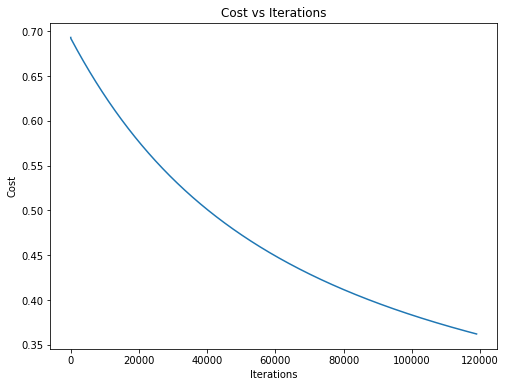

array([-4.22113117,  0.03542363,  0.50852291])

In [189]:
x = train_data[['perimeter_worst','concave points_worst']]
y = train_data.diagnosis
cost_list, w = multivariate_logistic_regression(x, y, alpha=0.0005,iterations=200000,threshold=1e-6)
w

In [190]:
print(w.shape,x.shape)

(3,) (427, 2)


In [211]:

def predict_multi(x,w) :
    x = np.c_[np.ones(x.shape[0]),x]
    prediction = []
    z = np.dot(x,w)
    ypred = sigmoid(z)
    for pred in ypred:
        if pred >= .50: 
            prediction.append(1)
        else :
            prediction.append(0)

    return prediction, z, ypred 

In [212]:
prediction , z, ypred = predict_multi(x,w)

In [213]:

F1_Score = f1_score(y, prediction)
print('F1 Score : ', F1_Score)

F1 Score :  0.8654545454545455


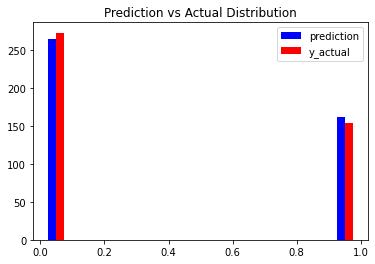

In [194]:
y_and_ypred = [prediction, y]
a = plt.subplot()
labels = ['prediction', 'y_actual']
colors = ['blue','red']
a.hist(y_and_ypred, bins = 10, rwidth=0.5,label=labels, color = colors)
a.legend(prop={'size': 10})
plt.title(label="Prediction vs Actual Distribution")
plt.show()